# Data

You can find the dataset [here](https://www.kaggle.com/mchirico/montcoalert)

## Kaggle (optional)


In [1]:
# To download dataset directly from Kaggle
# Here I'm using Google's Colab

!pip install kaggle

# Download kaggle.json file first
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# Download dataset directly from Kaggle using API command
!kaggle datasets download -d mchirico/montcoalert

 33% 8.00M/24.2M [00:00<00:00, 80.6MB/s]
100% 24.2M/24.2M [00:00<00:00, 119MB/s] 


In [2]:
# Extracting the zipfile downloaded from Kaggle
from zipfile import ZipFile

with ZipFile("montcoalert.zip", 'r') as z:
    # printing all the contents of the zip file
    z.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    z.extractall()
    print('Done!')

File Name                                             Modified             Size
911.csv                                        2020-07-29 20:19:16    123024590
Extracting all the files now...
Done!


# Imports

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')
matplotlib.rcParams['figure.figsize'] = (12,8) 

# Exploratory Data Analysis

In [4]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
# Get numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.values
print('Numeric cols :',num_cols)

Numeric cols : ['lat' 'lng' 'zip' 'e']


In [7]:
# Get Non-numeric/categorical columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns.values
print('Categorical cols :',cat_cols)

Categorical cols : ['desc' 'title' 'timeStamp' 'twp' 'addr']


In [8]:
df['zip'].value_counts()
# There are 204 unique Zip codes

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
           ...  
19457.0        1
18102.0        1
19543.0        1
19545.0        1
8077.0         1
Name: zip, Length: 204, dtype: int64

## Township (twp)

In [9]:
# 911 calls received from Five most and least townships.
df['twp'].value_counts()
# There are 68 unique townships in our dataset.

LOWER MERION       55490
ABINGTON           39947
NORRISTOWN         37633
UPPER MERION       36010
CHELTENHAM         30574
                   ...  
EAST GREENVILLE     1316
BRYN ATHYN          1254
GREEN LANE           385
PHILA COUNTY         267
LEHIGH COUNTY        190
Name: twp, Length: 68, dtype: int64

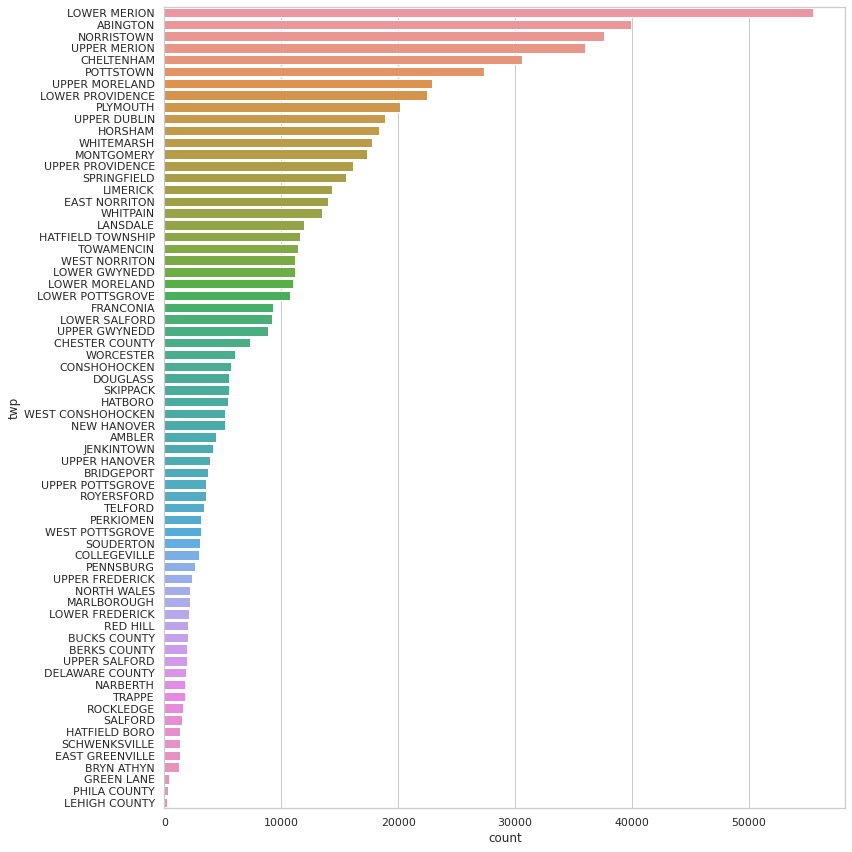

In [10]:
# Countplot of all the calls received from different townships
plt.figure(figsize=(12,12))
sns.countplot(y=df['twp'], order=df['twp'].value_counts().loc[:].index)
plt.tight_layout()

# From graph, it is observed that 9 townships made more than 20000 calls each between 2015-2020.
# Also, more than half of the townships have not crossed 10000 calls each during this juncture

## Title

In [11]:
# Title of the 911 calls received.
df['title'].value_counts().head(20)

Traffic: VEHICLE ACCIDENT -       148372
Traffic: DISABLED VEHICLE -        47909
Fire: FIRE ALARM                   38336
EMS: FALL VICTIM                   34676
EMS: RESPIRATORY EMERGENCY         34248
EMS: CARDIAC EMERGENCY             32332
EMS: VEHICLE ACCIDENT              25513
Traffic: ROAD OBSTRUCTION -        23235
EMS: SUBJECT IN PAIN               19646
EMS: HEAD INJURY                   18301
EMS: GENERAL WEAKNESS              11867
Fire: VEHICLE ACCIDENT             10864
EMS: SEIZURES                      10823
EMS: SYNCOPAL EPISODE              10806
EMS: UNKNOWN MEDICAL EMERGENCY     10698
EMS: MEDICAL ALERT ALARM           10394
EMS: ALTERED MENTAL STATUS         10088
Fire: FIRE INVESTIGATION            9444
EMS: ABDOMINAL PAINS                9005
EMS: UNCONSCIOUS SUBJECT            8791
Name: title, dtype: int64

In [12]:
# Title column have two parts divided by ':'
# Splitting Title into two columns, namely 'category' and 'purpose' of call.
df['category'] = df['title'].apply(lambda x:x.split(':')[0])
df['purpose'] = df['title'].apply(lambda x:x.split(':')[1])
df.drop('title', axis=1, inplace=True)

In [13]:
df['category'].value_counts()
# There are three main categories of calls in the dataset, 
# which are Emergency Medical Services(EMS), Traffic and Fire

EMS        332692
Traffic    230208
Fire       100622
Name: category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


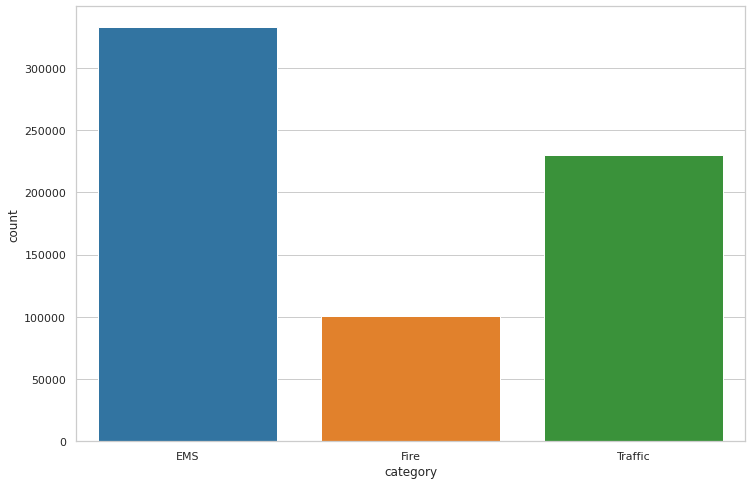

In [14]:
sns.countplot(df['category'])

In [15]:
display(df['purpose'].value_counts())
# There are 95 different Purposes/sub-categories of 911 calls as per the data.

print('\n ----In percentage---- \n')
100*(round(df['purpose'].value_counts()/len(df['purpose']),2)).head(3)

 VEHICLE ACCIDENT -     148372
 DISABLED VEHICLE -      47909
 FIRE ALARM              38452
 VEHICLE ACCIDENT        36377
 FALL VICTIM             34683
                         ...  
 ARMED SUBJECT               2
 FOOT PATROL                 1
 PRISONER IN CUSTODY         1
 ANIMAL COMPLAINT            1
 HIT + RUN                   1
Name: purpose, Length: 95, dtype: int64


 ----In percentage---- 



 VEHICLE ACCIDENT -    22.0
 DISABLED VEHICLE -     7.0
 FIRE ALARM             6.0
Name: purpose, dtype: float64

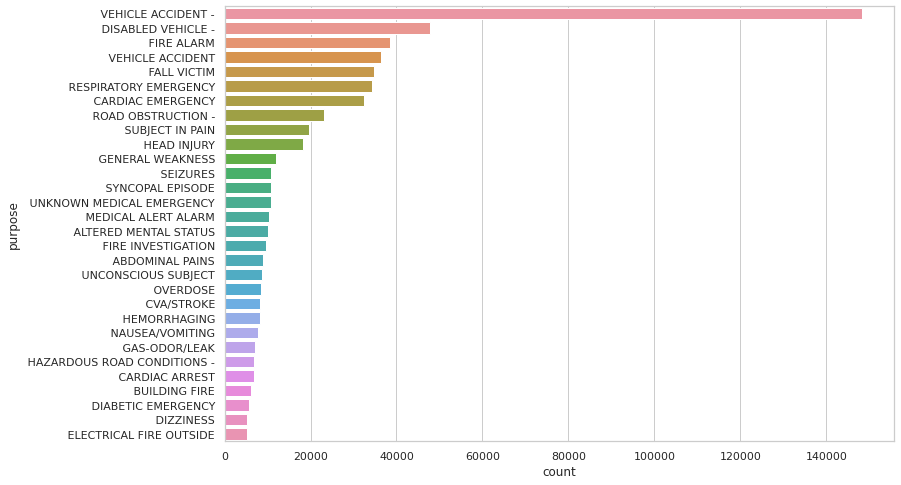

In [16]:
# There are 95 unique purpose, most purposes are less frequent. 
# Plotting 30 most frequent purpose vs count
sns.countplot(y=df['purpose'], order=df['purpose'].value_counts().iloc[:30].index)


# Based on Data, 'VEHICLE ACCIDENT' is the most common reason, resulting in whopping 22% of the of 911 calls (1.5 million calls) during 5 years span.
# Second one being 'DISABLED VEHICLE', resulting in 7% of calls (47909 calls).
# Finally,  ANIMAL COMPLAINT, HIT + RUN, PRISONER IN CUSTODY, and FOOT PATROL being the least reasons.


In [17]:
EMS = df[df['category']=='EMS']['purpose']
EMS.nunique()
# There are 81 unique calls under "EMS" category

81

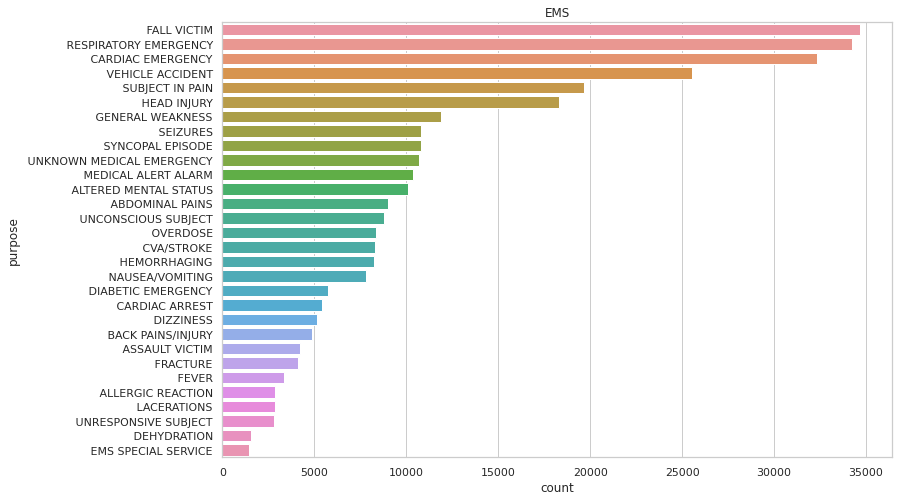

In [18]:
# Plotting 30 out of 81 most frequent call purposes under "EMS" category vs count
plt.title("EMS")
sns.countplot(y=EMS, order=EMS.value_counts().iloc[:30].index)

# From graph, Most common purpose for 911 calls under EMS category are FALL VICTIM, RESPIRATORY and CARDIAC EMERGENCY. 
# Each constituting over 10% off overall calls under EMS respectively.

In [19]:
Fire = df[df['category']=='Fire']['purpose']
Fire.nunique()

# There are 60 unique calls under "Fire" category

60

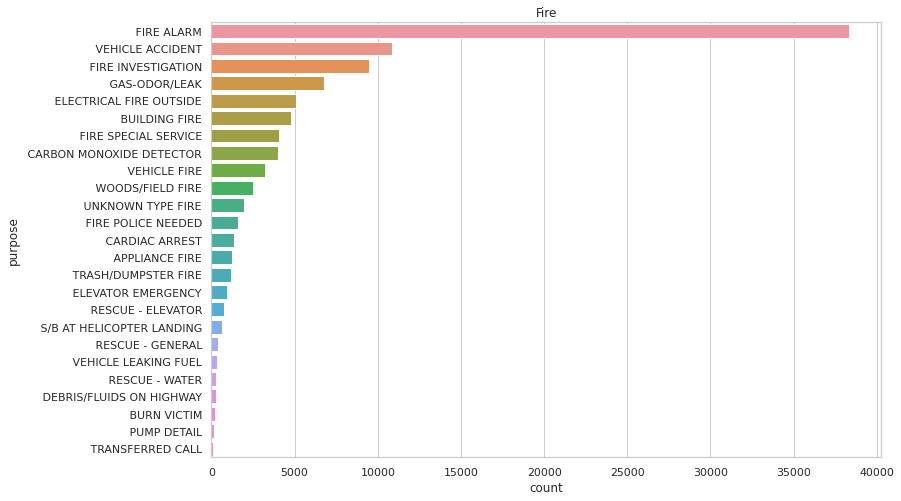

In [20]:
# Plotting 25 most frequent call purposes under "Fire" category vs count
plt.title("Fire")
sns.countplot(y=Fire, order=Fire.value_counts().iloc[:25].index)


# From graph, Most common purpose for 911 calls under "Fire" category is FIRE ALARM, which accounts for 38% of all calls under Fire category
# Further, VEHICLE ACCIDENT and FIRE INVESTIGATION adds up to around 10% each to total calls.

In [21]:
Traffic = df[df['category']=='Traffic']['purpose']
Traffic.value_counts()

# 7 unique subcategories/purposes under "Traffic" category

 VEHICLE ACCIDENT -             148372
 DISABLED VEHICLE -              47909
 ROAD OBSTRUCTION -              23235
 HAZARDOUS ROAD CONDITIONS -      6833
 VEHICLE FIRE -                   3366
 VEHICLE LEAKING FUEL -            292
 DEBRIS/FLUIDS ON HIGHWAY -        201
Name: purpose, dtype: int64

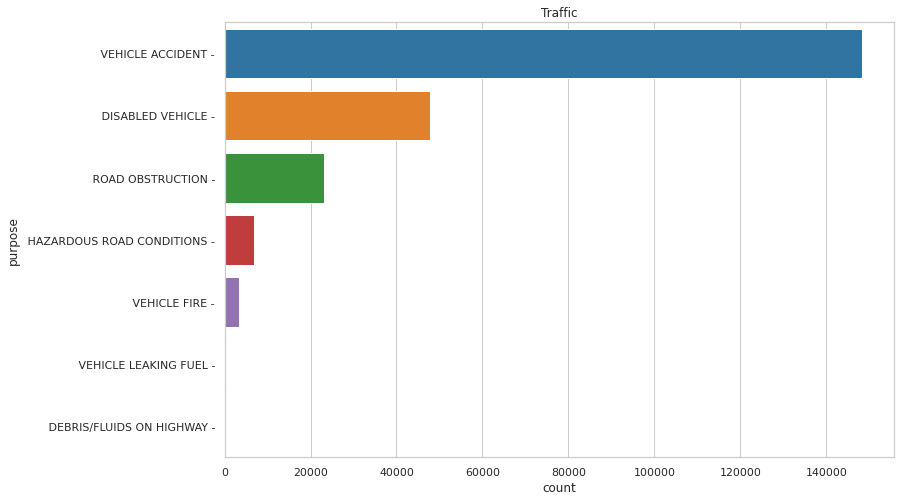

In [22]:
plt.title("Traffic")
sns.countplot(y=Traffic, order=Traffic.value_counts().index)

# From graph, again "VEHICLE ACCIDENT" is the top purpose of 911 calls accounts for 64% of all calls under Traffic category. 
# Next "DISABLED VEHICLE" and "ROAD OBSTRUCTION" together combines to 31%.
# Intrestingly, these three reasons alone constitutes 95% of 911 calls related to Traffic

## Time Stamp

In [23]:
# TimeStamp is of string type
print(df['timeStamp'].dtype)
df['timeStamp']

# Note:
# The observation start from Dec-2015 to July-2020 here, hence less datapoints to make inferences on these years. 

object


0         2015-12-10 17:10:52
1         2015-12-10 17:29:21
2         2015-12-10 14:39:21
3         2015-12-10 16:47:36
4         2015-12-10 16:56:52
                 ...         
663517    2020-07-29 15:46:51
663518    2020-07-29 15:52:19
663519    2020-07-29 15:52:52
663520    2020-07-29 15:54:08
663521    2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: object

In [24]:
# Converting timeStamp in to datetime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print(df['timeStamp'].dtype)

datetime64[ns]


In [25]:
# Converting Datetime column in to new columns
df['date'] = df['timeStamp'].apply(lambda x: x.date())
df['year'] = df['timeStamp'].apply(lambda x: x.year)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [26]:
# New columns
df[['date', 'year', 'month', 'day', 'hour']]

,date,year,month,day,hour
0,2015-12-10,2015,12,3,17
1,2015-12-10,2015,12,3,17
2,2015-12-10,2015,12,3,14
3,2015-12-10,2015,12,3,16
4,2015-12-10,2015,12,3,16
...,...,...,...,...,...
663517,2020-07-29,2020,7,2,15
663518,2020-07-29,2020,7,2,15
663519,2020-07-29,2020,7,2,15
663520,2020-07-29,2020,7,2,15


## Year


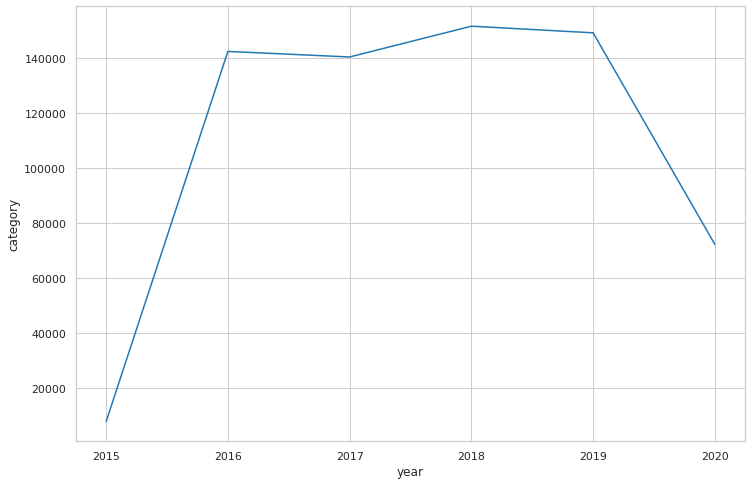

In [27]:
# Line graph of 911 call count of all categories for each year from 2015 to 2020
sns.lineplot(data=df.groupby('year').count()['category'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


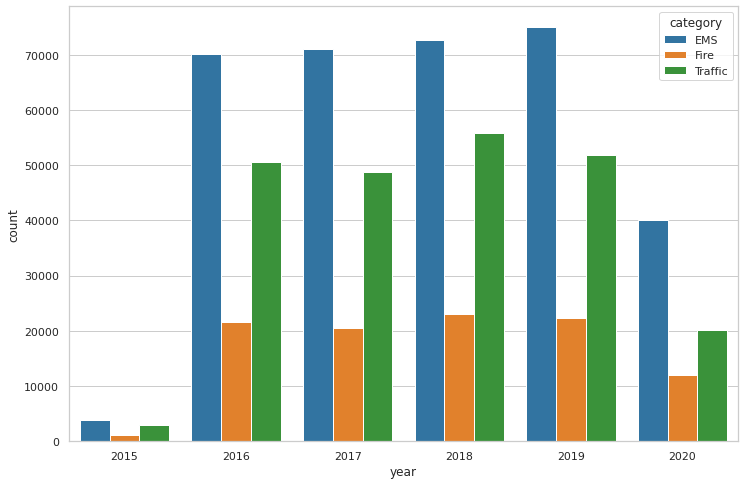

In [28]:
# Bar graph of 911 call count per category for each year from 2015 to 2020
sns.countplot(df['year'], hue=df['category'])

## Month


In [29]:
df['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [30]:
# Mapping Month names to numbers
df['month'] = df['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['month'].unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov'], dtype=object)

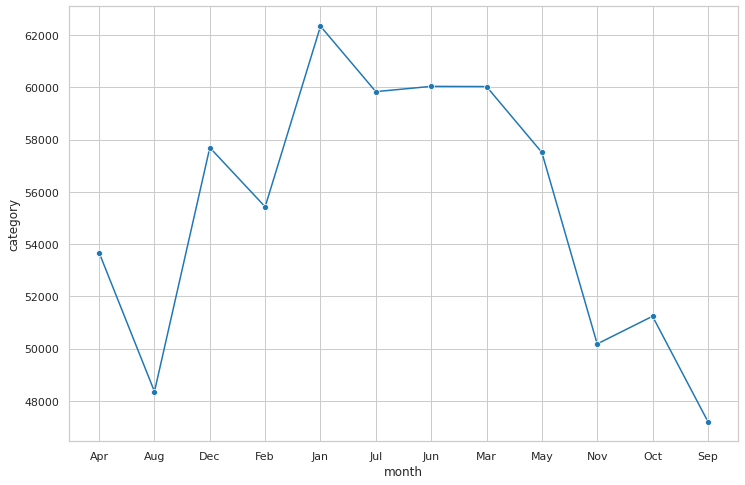

In [31]:
# Line graph of 911 calls count in individual months (Jan-Dec)
sns.lineplot(data=df.groupby('month').count()['category'], marker='o')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


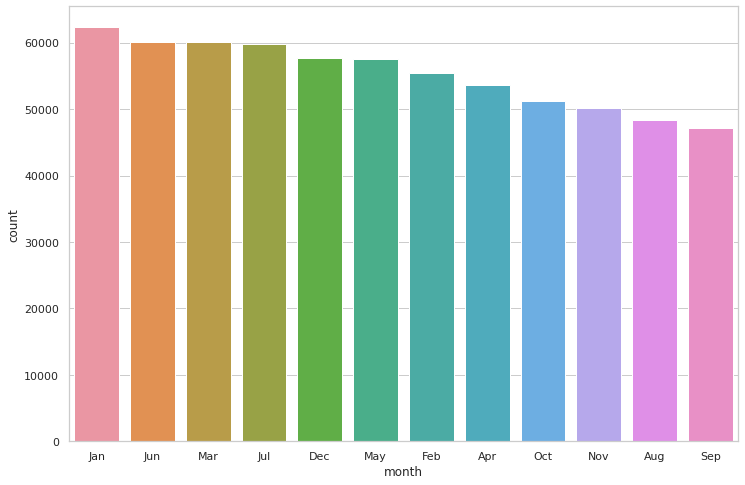

In [32]:
# Bar graph of 911 calls count per month, sorted in decreasing order.
sns.countplot(df['month'], order=df['month'].value_counts().index)

# From Graph, 'January' received the highest number of calls, while least in 'September'. 
# Also, number of calls received on 'March', 'June' and 'July' are almost same. 
# Simillarly, in 'May' and 'December'.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


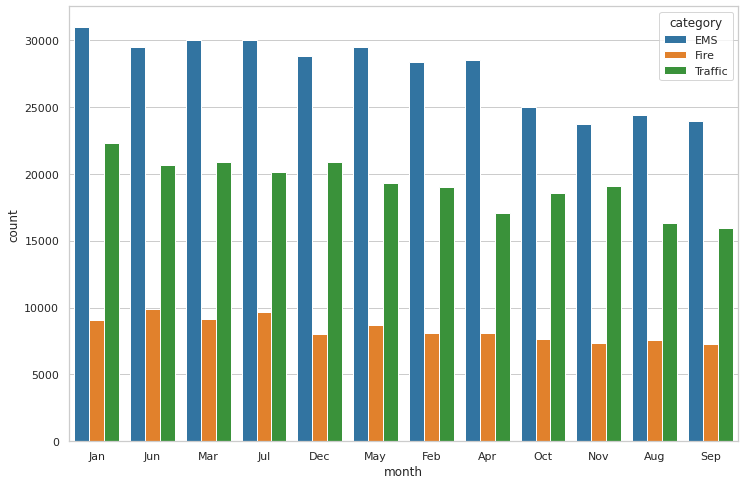

In [33]:
# Bar graph of 911 calls count per month for each category, sorted in decreasing order.
sns.countplot(df['month'], order=df['month'].value_counts().index, hue=df['category'])
# This is same as above graph, where the total sum is splitted by categories

# From graph below, Calls received related to 'Fire' in all months are approximately same,
# On an average of around 8000 calls each month.

## Day

In [34]:
df['day'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [35]:
# Mapping Day of the week to numbers
df['day'] = df['day'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['day'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

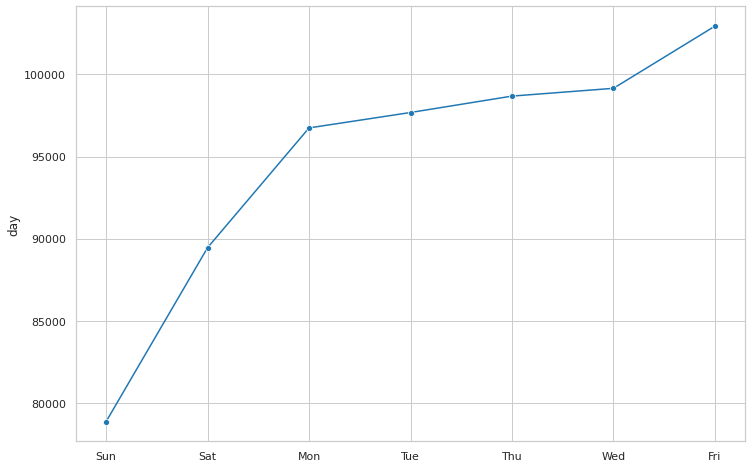

In [36]:
# Line graph of overall 911 calls count for each day of the week in Ascending Order.
sns.lineplot(data=df['day'].value_counts()[::-1], marker='o')


# From Graph it is clearly understood that, 911 calls are least received during weekends, specially on Sundays 
# It significantly increases on Monday (mostly Traffic from Bar graph)
# and gradually increases on other days till it hits the peak on Fridays (~ 1.03 million calls)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


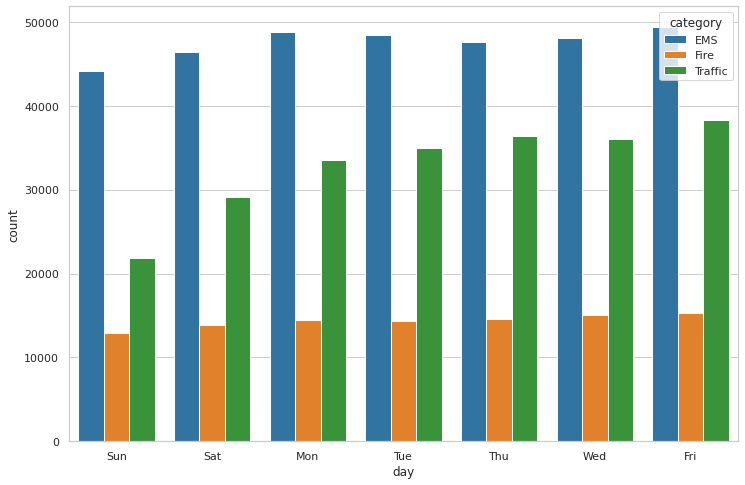

In [37]:
# Bar graph of overall 911 calls count for each day of the week in Ascending Order.
sns.countplot(df['day'], order=df['day'].value_counts()[::-1].index, hue=df['category'])

## Month-Year Matrix

**Note:**

Notice that usually 2020 is excluded when calculating total calls received in a 'Year', as it contains incomplete data of only 7 months (Jan-Jul). 

But in this section, we are comparing monthly calls of every year. As April 2020 contains complete data from 1st to 30th and it is considered.

In [47]:
df[df['month']=='Apr']['date']

43467     2016-04-01
43468     2016-04-01
43469     2016-04-01
43470     2016-04-01
43471     2016-04-01
             ...    
632673    2020-04-30
632674    2020-04-30
632675    2020-04-30
632676    2020-04-30
632677    2020-04-30
Name: date, Length: 53671, dtype: object

year,2015,2016,2017,2018,2019,2020
month,,,,,,
Apr,NaN,11287.0,11056.0,11240.0,11845.0,8243.0
Aug,NaN,11904.0,11753.0,12315.0,12387.0,NaN
Dec,7916.0,12162.0,12941.0,12144.0,12529.0,NaN
Feb,NaN,11396.0,10267.0,11165.0,11556.0,11043.0
Jan,NaN,13096.0,11605.0,13123.0,12304.0,12208.0
Jul,NaN,12088.0,11768.0,12549.0,13166.0,10261.0
Jun,NaN,11732.0,12333.0,12106.0,12322.0,11541.0
Mar,NaN,11059.0,11684.0,14923.0,12441.0,9920.0
May,NaN,11374.0,11719.0,12551.0,12823.0,9042.0


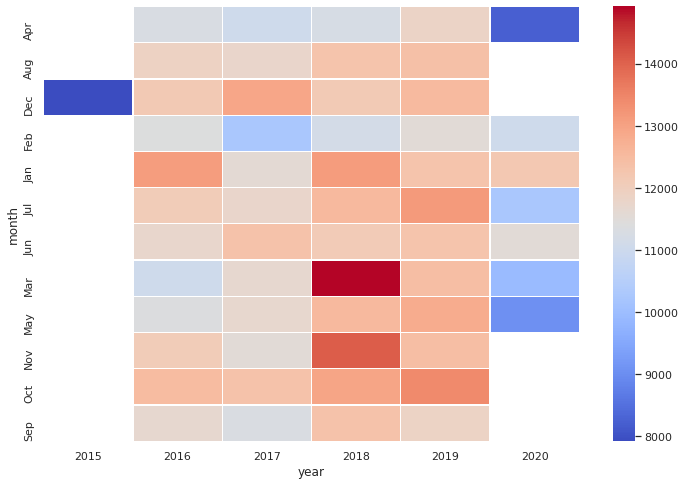

In [38]:
# Month and Year Matrix

year_month = df.groupby(['month', 'year'], dropna=True).count()['category'].unstack()
display(year_month)
sns.heatmap(year_month, cmap='coolwarm', lw=0.25)


# As stated before, 2015 and 2020 doesn't have complete data, hence null values.
# For better visualization Heatmap is used.

# From Heatmap, 
# 'March 2018' recorded the highest 911 calls of 14923 as per our dataset.
# and 'April 2020' recorded the least calls of 8243 (excluding 2015 as it has only 10th Dec) 



## Day of Week and Month Matrix

In [39]:
# Day of the Week and Month Matrix

month_day = df.groupby(['day', 'month']).count()['category'].unstack()
display(month_day)

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
day,,,,,,,,,,,,
Fri,7997,7336,9305,8255,9309,8681,9207,10941,8904,8379,6934,7694
Mon,8410,6854,8492,8747,8896,9499,8511,8060,7881,6722,8075,6598
Sat,7514,6111,8592,7593,8475,7748,8198,8050,7223,6773,6609,6566
Sun,6865,5275,7165,6452,7478,7859,6837,6766,6694,5196,6316,5956
Thu,7722,7508,8151,7997,9055,8378,9489,8849,8740,8358,7482,6954
Tue,7561,7291,8305,8087,9714,9086,8349,8372,9026,7344,7948,6601
Wed,7602,7984,7682,8296,9409,8581,9443,8989,9041,7410,7876,6844


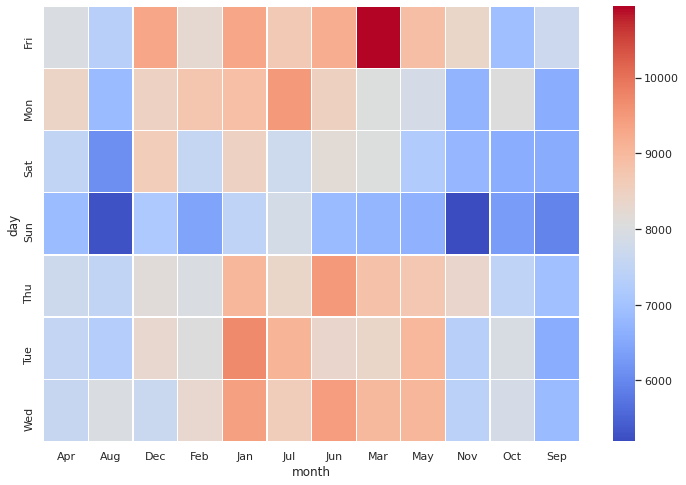

In [40]:
# Heatmap of the above matrix
sns.heatmap(month_day, cmap='coolwarm', lw=0.25)

# From Heatmap
# The highest number of calls documented on a 'Friday', in 'March' with 10941 calls
# The Least number of calls documented on a 'Sunday' in 'November' with 5196 calls  

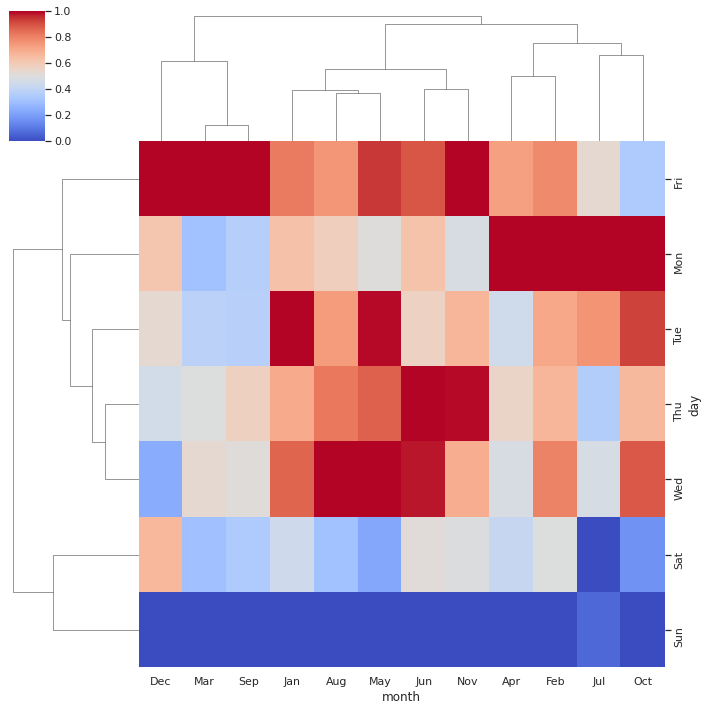

In [41]:
# Cluster Map for more detailed relationship between months and between days of week.
# Scaled the values between 0 to 1 for more contrast

sns.clustermap(month_day, cmap='coolwarm', standard_scale=1)

## Day of the Week and Hour Matrix

In [42]:
# Day of the Week and Hour Matrix
day_hour = df.groupby(['day', 'hour']).count()['category'].unstack()
display(day_hour)

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,5584,5843,5994,6181,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,5458,5632,5881,5664,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,4944,5450,5555,5378,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,4262,4438,4882,4654,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,5464,5492,5898,6173,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,5498,5582,5795,5794,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,5367,5639,6092,5953,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


In [43]:
# Total calls on given hour per Day of the Week
day_hour.sum()

hour
0     13863
1     11751
2     10653
3      9488
4      9265
5     11676
6     17219
7     26971
8     33380
9     35477
10    36577
11    38076
12    40097
13    39797
14    40346
15    42263
16    42797
17    44119
18    37322
19    32442
20    28079
21    24659
22    20313
23    16892
dtype: int64

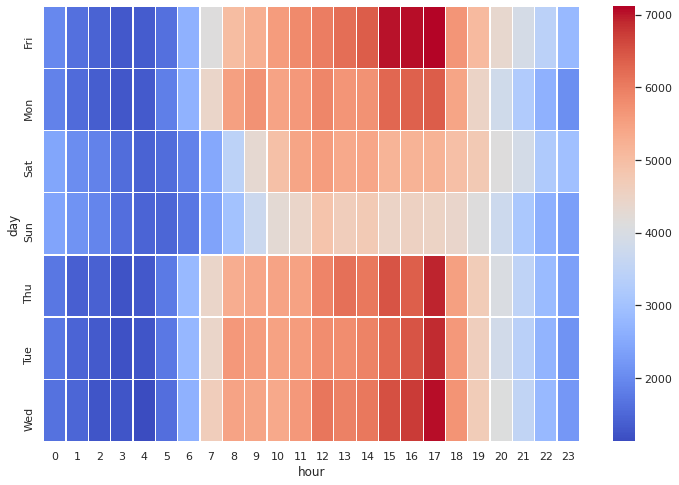

In [44]:
sns.heatmap(day_hour, cmap='coolwarm', lw=0.25)

# From heatmap,
# 911 calls start rising significantly from 7 a.m. (except Weekends), till 8 p.m. (hour 20)
# Most calls are observed at Hour 17 and Highest recorded at Hour 17, on Friday of 7113 calls
# Least calls are observed at Hour 4 and lowest recorded at Hour 4, on Wednesday of 1128 calls

# Data Insights

**To summarize,**

A total of 663522 911 calls are observed between *10-Dec-2015* and *29-Jul-2020*.



1. **Individual Feature Analysis**



|  | Most Calls Received | Least Calls Received |
| ---------------: | :---------- | :----------- |
| **Call Category** | EMS | Fire |
| **Call Purpose** | Vehicle Accident | - |
| **Township** | Lower Merion | Lehigh County |
| **Year** | 2018 | 2017 (excluding partial years)|
| **Month** | January | September|
| **Day of Week**| Friday | Sunday  |
| **Hour of Day** | 17 (5 p.m)| 4 a.m |



2. **Combined Analysis**

| Particular | Highest on | Least on |
| ---------------: | :---------- | :----------- |
| **Month in Years** | March 2018 (14923) | April 2020 (8243) |
| **Day of Week in Months** | Fridays in March (10941) | Sundays in November (5196) |
| **Hour in Days** | 5 p.m on Fridays (7113)| 4 a.m on Wednesdays (1128) |
